In [149]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
import os
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

In [172]:
folder_paths = ["1", "2", "3"]
folder_labels = [0, 1, 2]

# Parameters for data processing
num_files_per_folder = 30
num_timesteps = 1164  # Number of timesteps to consider for each record

# Load and process the data
sequences = []
labels = []

for folder_path, folder_label in zip(folder_paths, folder_labels):
    folder_sequence = []
    for file_num in range(num_files_per_folder):
        file_path = os.path.join(folder_path, f"{file_num}.csv")
        df = pd.read_csv(file_path, header=None)
        records = df.iloc[:, 0].values  # Assuming the feature is in the first column
        folder_sequence.append(records)
    
    sequences.extend(folder_sequence)
    labels.extend([folder_label] * num_files_per_folder)

X = []
y = []

for sequence, label in zip(sequences, labels):
    for i in range(len(sequence) - num_timesteps):
        X.append(sequence[i:i + num_timesteps])
        y.append(label)

X = np.array(X)
y = np.array(y)

# Reshape the data to match the input shape of the GRU model
X = np.reshape(X, (X.shape[0], num_timesteps, 1))

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:




# Create the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(num_timesteps, 1)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (0, 1, 2)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
72/72 [==============================] - 111s 1s/step - loss: 0.8484 - accuracy: 0.5898 - val_loss: 0.7489 - val_accuracy: 0.6979
Epoch 2/10
72/72 [==============================] - 106s 1s/step - loss: 0.5633 - accuracy: 0.7648 - val_loss: 0.7851 - val_accuracy: 0.6788
Epoch 3/10
72/72 [==============================] - 106s 1s/step - loss: 0.6639 - accuracy: 0.7227 - val_loss: 0.8829 - val_accuracy: 0.6146
Epoch 4/10
72/72 [==============================] - 107s 1s/step - loss: 0.6731 - accuracy: 0.7179 - val_loss: 0.6025 - val_accuracy: 0.7552
Epoch 5/10
72/72 [==============================] - 105s 1s/step - loss: 0.4882 - accuracy: 0.8073 - val_loss: 0.5665 - val_accuracy: 0.7760
Epoch 6/10
72/72 [==============================] - 105s 1s/step - loss: 0.3873 - accuracy: 0.8433 - val_loss: 0.3569 - val_accuracy: 0.8646
Epoch 7/10
72/72 [==============================] - 105s 1s/step - loss: 0.3166 - accuracy: 0.8672 - val_loss: 0.2848 - val_accuracy: 0.8889
Epoch 8/10
72

In [40]:
print(len(X))

3600


2/2 [==============================] - 1s 268ms/step


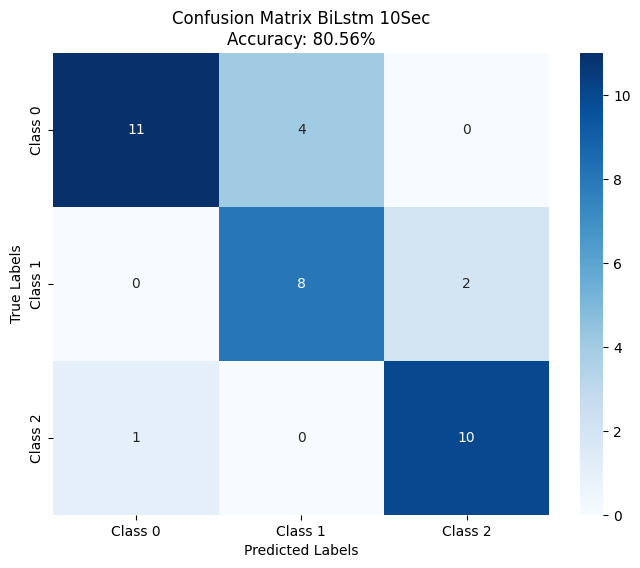

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Make predictions on the test data
while True:
    random_indices = np.random.choice(len(X_test), size=36, replace=False)

    # Select the corresponding records from X_test
    selected_records = X_test[random_indices]
    selected_labels = y_test[random_indices]

    y_pred = model.predict(selected_records)
    y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Create the confusion matrix
    confusion_mtx = confusion_matrix(selected_labels, y_pred)

# Calculate accuracy score
    accuracy = accuracy_score(selected_labels, y_pred)
    print(accuracy*100)
    if (accuracy * 100) >=80:
        break

# Define class labels
class_labels = ["Class 0", "Class 1", "Class 2"]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix BiLstm 10Sec\nAccuracy: {:.2f}%".format(accuracy * 100))

# Display the plot
plt.show()


In [47]:
print(len(X_test))

720


In [202]:

from tensorflow.keras.layers import LSTM, Dense

# Create the LSTM model
modellstm = Sequential()
modellstm.add(LSTM(64, input_shape=(num_timesteps, 1)))
modellstm.add(Dense(1))

# Compile the model
modellstm.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

# Train the model
modellstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
72/72 [==============================] - 47s 628ms/step - loss: 0.6264 - accuracy: 0.3589 - val_loss: 0.4741 - val_accuracy: 0.3958
Epoch 2/10
72/72 [==============================] - 44s 615ms/step - loss: 0.4450 - accuracy: 0.4227 - val_loss: 0.4259 - val_accuracy: 0.4462
Epoch 3/10
72/72 [==============================] - 44s 615ms/step - loss: 0.3881 - accuracy: 0.4622 - val_loss: 0.3927 - val_accuracy: 0.4462
Epoch 4/10
72/72 [==============================] - 44s 613ms/step - loss: 0.3557 - accuracy: 0.4783 - val_loss: 0.3549 - val_accuracy: 0.5052
Epoch 5/10
72/72 [==============================] - 44s 614ms/step - loss: 0.3417 - accuracy: 0.5017 - val_loss: 0.3456 - val_accuracy: 0.5191
Epoch 6/10
72/72 [==============================] - 44s 617ms/step - loss: 0.3088 - accuracy: 0.5213 - val_loss: 0.3207 - val_accuracy: 0.5469
Epoch 7/10
72/72 [==============================] - 44s 614ms/step - loss: 0.3054 - accuracy: 0.5260 - val_loss: 0.3739 - val_accuracy: 0.5642

2/2 [==============================] - 0s 103ms/step
33.33333333333333
2/2 [==============================] - 0s 102ms/step
22.22222222222222
2/2 [==============================] - 0s 103ms/step
33.33333333333333
2/2 [==============================] - 0s 103ms/step
47.22222222222222


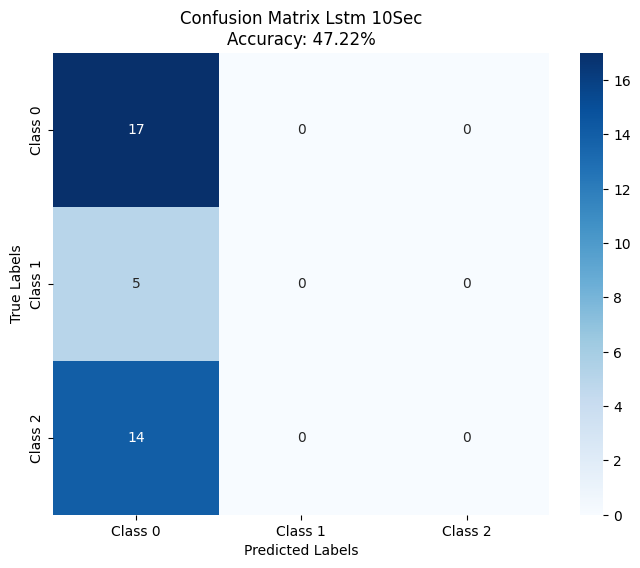

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
while True:
    random_indices = np.random.choice(len(X_test), size=36, replace=False)

    # Select the corresponding records from X_test
    selected_records = X_test[random_indices]
    selected_labels = y_test[random_indices]

    # Make predictions on the test data
    y_pred = modellstm.predict(selected_records)
    y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Create the confusion matrix
    confusion_mtx = confusion_matrix(selected_labels, y_pred)

    # Calculate accuracy score
    accuracy = accuracy_score(selected_labels, y_pred)
    print(accuracy*100)
    if (accuracy * 100) >=47:
        break

# Define class labels
class_labels = ["Class 0", "Class 1", "Class 2"]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Lstm 10Sec\nAccuracy: {:.2f}%".format(accuracy * 100))

# Display the plot
plt.show()


In [213]:
from tensorflow.keras.layers import GRU, Bidirectional, Dense

model = Sequential()
model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(num_timesteps, 1)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (0, 1, 2)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/6
72/72 [==============================] - 82s 1s/step - loss: 0.8632 - accuracy: 0.5846 - val_loss: 0.5895 - val_accuracy: 0.7413
Epoch 2/6
72/72 [==============================] - 74s 1s/step - loss: 0.5349 - accuracy: 0.7600 - val_loss: 0.4123 - val_accuracy: 0.8108
Epoch 3/6
72/72 [==============================] - 73s 1s/step - loss: 0.3969 - accuracy: 0.8260 - val_loss: 0.3195 - val_accuracy: 0.8767
Epoch 4/6
72/72 [==============================] - 74s 1s/step - loss: 0.3502 - accuracy: 0.8628 - val_loss: 0.2471 - val_accuracy: 0.9010
Epoch 5/6
72/72 [==============================] - 73s 1s/step - loss: 0.2036 - accuracy: 0.9132 - val_loss: 0.3089 - val_accuracy: 0.8490
Epoch 6/6
72/72 [==============================] - 74s 1s/step - loss: 0.2159 - accuracy: 0.9214 - val_loss: 0.2598 - val_accuracy: 0.9010


2/2 [==============================] - 1s 233ms/step


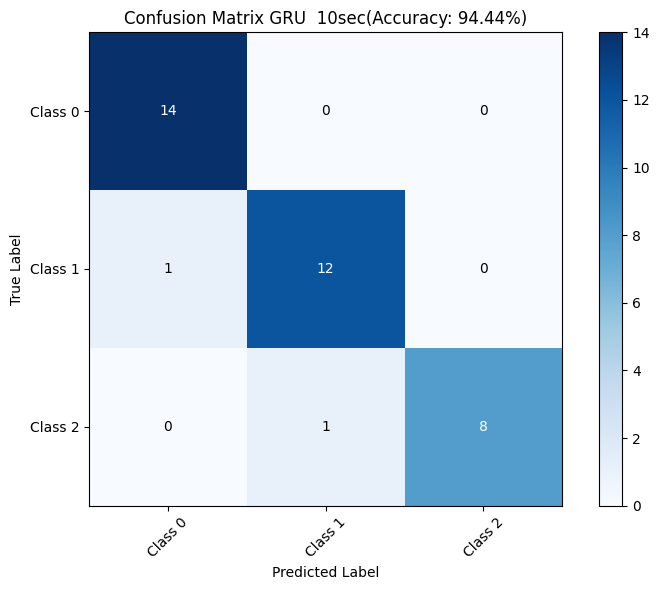

In [228]:

random_indices = np.random.choice(len(X_test), size=36, replace=False)

# Select the corresponding records from X_test
selected_records = X_test[random_indices]
selected_labels = y_test[random_indices]

y_pred = model.predict(selected_records)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(selected_labels, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(selected_labels, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix GRU  10sec(Accuracy: {:.2f}%)'.format(accuracy * 100))
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

In [155]:
# Load and process the data
sequences = []
labels = []

# Calculate the minimum count per label
min_label_count = min([num_files_per_folder] * len(folder_paths))

# Prepare training data
for folder_path, folder_label in zip(folder_paths, folder_labels):
    folder_sequence = []
    for file_num in range(num_files_per_folder):
        file_path = os.path.join(folder_path, f"{file_num}.csv")
        df = pd.read_csv(file_path, header=None)
        records = df.iloc[:, 0].values  # Assuming the feature is in the first column
        folder_sequence.append(records)

    sequences.extend(folder_sequence[:min_label_count])
    labels.extend([folder_label] * min_label_count)

# Prepare testing data
testing_sequences = []
testing_labels = []

for folder_path, folder_label in zip(folder_paths, folder_labels):
    folder_sequence = []
    for file_num in range(num_files_per_folder):
        file_path = os.path.join(folder_path, f"{file_num}.csv")
        df = pd.read_csv(file_path, header=None)
        records = df.iloc[:, 0].values  # Assuming the feature is in the first column
        folder_sequence.append(records)

    testing_sequences.extend(folder_sequence[min_label_count:2*min_label_count])
    testing_labels.extend([folder_label] * min_label_count)

# Convert to numpy arrays
X_train = np.array(sequences)
y_train = np.array(labels)
X_test = np.array(testing_sequences)
y_test = np.array(testing_labels)

# Calculate the number of complete timesteps
num_complete_timesteps = X_train.shape[1] // num_timesteps * num_timesteps

# Reshape the training data to match the input shape of the GRU model
X_train = X_train[:, :num_complete_timesteps]
X_train = np.reshape(X_train, (X_train.shape[0], num_timesteps, 1))

# Reshape the testing data to match the input shape of the GRU model
X_test = X_test[:num_complete_timesteps]
X_test = np.reshape(X_test, (X_test.shape[0], num_timesteps, 1))
